In [9]:
import numpy as np
import sympy
import math
from matplotlib import pyplot as plt
%matplotlib inline
from sympy import init_printing
init_printing()

## Burgers Equation

Burgers equation in 1-Dimension is given by:

$\frac{\partial u}{\partial t}+ u\frac{\partial u}{\partial x}$ = $\nu \frac{\partial^2 U}{\partial x^2}$

#### Discretizing

$ \frac{u_i^{n+1}-u_i^n}{\Delta t}+ u_i^n \frac{u_i^n - U_{i-1}^n}{\Delta x} = \nu \frac{U_{i+1}^n-2u_i^n+u{i-1}^n}{\Delta x^2}$

In [13]:
x, nu, t = sympy.symbols('x nu t')
phi = sympy.exp(-(x-4*t)**2/(4*nu*(t+1))) + \
sympy.exp(-(x-4*t-2*np.pi)**2/(4*nu*(t+1)))
phi

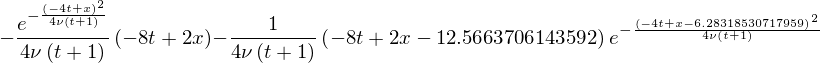

In [14]:
phiprime = phi.diff(x)
phiprime

In [17]:
u_lamb = lambdify((t, x, nu), u)
print("The value of u at t=1, x=4, nu=3 is {}.".format(u_lamb(1,4,3)))

The value of u at t=1, x=4, nu=3 is 3.4917066420644494.


In [38]:
nx = 101
nt = 100
dx = 2*np.pi/(nx-1)
nu = 0.07
sigma = 0.1
dt = sigma*dx**2/nu

x = np.linspace(0, 2*np.pi, nx)
#print(x)
#print (2*np.pi)
un = np.empty(nx)
t = 0


In [39]:
u = np.asarray([u_lamb(t, x0, nu) for x0 in x])
print (u)

[ 4.          4.06283185  4.12566371  4.18849556  4.25132741  4.31415927
  4.37699112  4.43982297  4.50265482  4.56548668  4.62831853  4.69115038
  4.75398224  4.81681409  4.87964594  4.9424778   5.00530965  5.0681415
  5.13097336  5.19380521  5.25663706  5.31946891  5.38230077  5.44513262
  5.50796447  5.57079633  5.63362818  5.69646003  5.75929189  5.82212374
  5.88495559  5.94778745  6.0106193   6.07345115  6.136283    6.19911486
  6.26194671  6.32477856  6.38761042  6.45044227  6.51327412  6.57610598
  6.63893783  6.70176967  6.76460125  6.82742866  6.89018589  6.95176632
  6.99367964  6.72527549  4.          1.27472451  1.00632036  1.04823368
  1.10981411  1.17257134  1.23539875  1.29823033  1.36106217  1.42389402
  1.48672588  1.54955773  1.61238958  1.67522144  1.73805329  1.80088514
  1.863717    1.92654885  1.9893807   2.05221255  2.11504441  2.17787626
  2.24070811  2.30353997  2.36637182  2.42920367  2.49203553  2.55486738
  2.61769923  2.68053109  2.74336294  2.80619479  2.

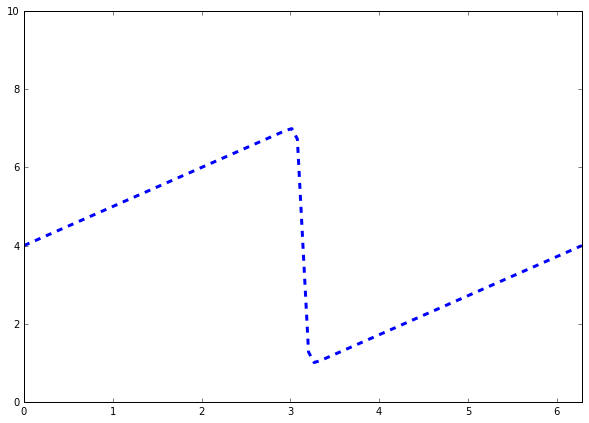

In [48]:
plt.figure(figsize=(10,7), dpi=100)
plt.plot(x,u, ls= "--", lw=3)
plt.xlim([0,2*np.pi])
plt.ylim([0,10]);